# Introduction to Data Visualization <font color='blue'> (15 min) </font>

# Google doc with code corrections is accessible at:
### https://docs.google.com/document/d/1Ks66tyNbHA5GobgiAY_S2ApvKMJmCF57N4cwuXLpjfQ/edit?usp=sharing

# 0) Importing the right tools <font color='blue'> (5 min) </font>

### <font color='red'>0.1) Import the necessary packages: </font>

- pandas (aliased as pd)
- seaborn (aliased as sns)
- matplotlib.pyplot (aliased as plt)

In [1]:
from __future__ import division

#### IMPORT THE ABOVE PACKAGES WITH THE ADEQUATE ALIASES ####
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### <font color='red'>0.2) Import the dataset from <i>'../data/data_after_collection_cleaning.csv'</i> using the <i>pd.read_csv()</i> function</font>

In [2]:
data = pd.read_csv('./my_data_after_collection.csv')

In [3]:
len(data)

797219

### <font color='red'>0.3) Show a sample of 2 observations from the dataset, using the <i>.sample()</i> function</font>

In [4]:
data.sample(2)

tripduration            starttime             stoptime  \
464702           221  2015-06-29 13:28:00  2015-06-29 13:31:00   
233048           473  2015-06-19 18:09:00  2015-06-19 18:17:00   

        start station id start station name  start station latitude  \
464702               479    9 Ave & W 45 St               40.760193   
233048               442    W 27 St & 7 Ave               40.746647   

        start station longitude  end station id       end station name  \
464702               -73.991255             448       W 37 St & 10 Ave   
233048               -73.993915             293  Lafayette St & E 8 St   

        end station latitude  end station longitude  bikeid    usertype  \
464702             40.756604             -73.997901   20117  Subscriber   
233048             40.730287             -73.990765   17599  Subscriber   

        birth year  gender  Precipitationmm        Conditions  TemperatureC  \
464702      1978.0       1              0.0             Clear          19.4   
233048      1984.0       1              0.0  Scattered Clouds          28.9   

        total_docks_start  total_docks_end  
464702                 31               31  
233048                 51               55

# Visualizations

## 1) Plotting bike stations with Basemap <font color='blue'> (15 min) </font>

### <font color='red'>1.1) Go on the following websites to understand how Basemap functions </font>

- http://matplotlib.org/basemap/users/geography.html
- http://matplotlib.org/basemap/users/examples.html

### <font color='red'>Run the following block, and understand what the <i>stations</i> object is </font>

In [5]:
stations = (set(zip(data['start station latitude'], 
                    data['start station longitude']))
            .union(set(zip(data['end station latitude'], 
                           data['end station longitude']))))

### <font color='red'>1.2) Print the total number of stations, using the <i>len</i> function</font>

In [6]:
len(stations)

303

### <font color='red'>Run the following blocks, that will define the bounds for the Basemap plot</font>

In [7]:
stations_lat = [x[0] for x in stations]
stations_long = [x[1] for x in stations]

In [8]:
b = min(stations_lat)  # bottom
t = max(stations_lat)  # top
l = min(stations_long)  # left
r = max(stations_long)  # right

### <font color='red'>Run the following block, that defines the Basemap Map with the adequate bounds</font>

### Alternative to basemap

In [9]:
import folium

In [10]:
avg_lat = mean(stations_lat)
avg_long = mean(stations_long)

m=folium.Map(location=[avg_lat,avg_long] ,zoom_start=10)

for line in range(len(stations_lat)):
    longi = stations_long[line] 
    lat = stations_lat[line]
    m.simple_marker([lat,longi],popup='station',marker_color='red')

/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [11]:
m

### <font color='red'>1.3) Compute the map projection coordinates of stations longitudes and latitudes, using the <i>map</i> object over both stations_long and stations_lat lists </font>

x, y = #### USE THE map OBJECT TO PROJECT STATIONS LONGITUDES AND LATITUDES, GET HELP ON THE BASEMAP WEBPAGE ####
       #### MAKE SURE YOU PROJECT LONGITUDES AND LATITUDES IN THE RIGHT ORDER ####

### <font color='red'>1.4) Draw the map, along with: </font>
- stations longitudes and latitudes (i.e : x and y)
- coastlines
- map boundaries
- fill the continents with the 'coral' color
- Add a title to the map

plt.figure(figsize=(10,20))

#### DRAW THE MAP ALONG WITH COASTLINES, MAP BOUNDARIES, AND BIKE STATIONS ####

plt.show()

## 2) Plotting with a background image from OpenStreetMap <font color='blue'> (15 min) </font>

### <font color='red'>2.1) An image of Manhattan has been downloaded on https://www.openstreetmap.org. For ease of use, you just need to import the image, so you will be able to plot stations on this image. Run the following block, that defines the right box bounds.</font>

In [13]:
l,r,b,t = (-74.0173,-73.9584,40.6990,40.7708)  # Left, right, bottom, top corners

### <font color='red'>2.2) Read the uploaded image using the <i>plt.imread()</i> function</font>

In [14]:
im = plt.imread('./image/map.png')

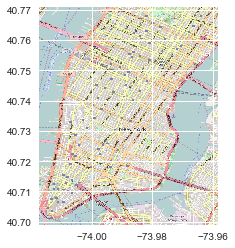

In [15]:
plt.imshow(im,extent=[l,r,b,t])

### <font color='red'>2.3) Plot the stations on the image background, using the following:</font>
- plt.imshow() with the <i>extent=[l,r,b,t]</i> attribute
- plt.plot() on stations_long and stations_lat lists
- Add a title for the plot, as well as labels for x and y axes
- <b>Warning</b> : do not use <i>x</i> and <i>y</i> computed above any more, since they were the projections on the Basemap image in the previous section, and are not of any use here any more. Here, only <i>stations_long</i> and <i>stations_lat</i> need to be used.

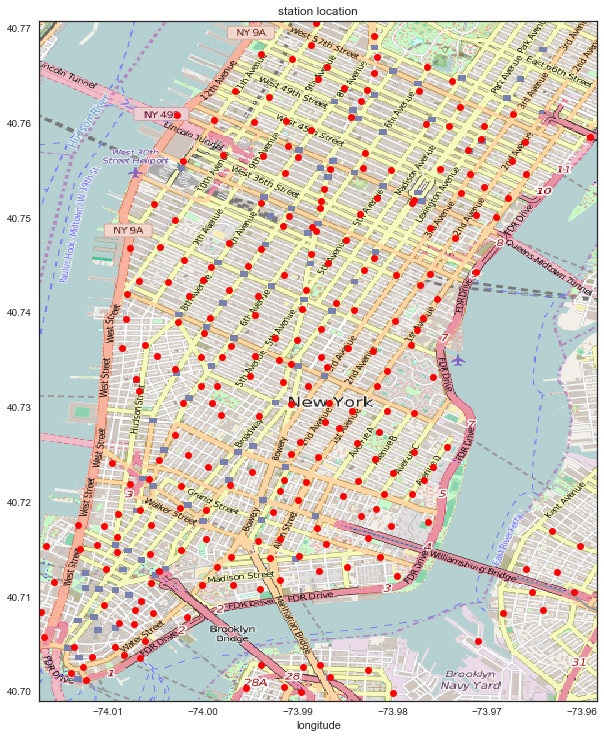

In [16]:
sns.set_style("white")  # Sets a white background 
plt.figure(figsize=(10,15))  # Initialize the figure

#### FIRST PLOT STATIONS USING plt.plot ON stations_long ALONG WITH stations_lat LISTS ####
plt.plot(stations_long,stations_lat,'or')
#### THEN PLOT THE BACKGROUND IMAGE USING plt.imshow() ON THE im IMAGE ####
### YOU WILL NEED TO ADD THE extent=[l,r,b,t] ATTRIBUTE TO FIX THE RIGHT BOUNDS ON THE IMAGE ####
plt.imshow(im,extent=[l,r,b,t])
#### ADD A TITLE, AND X AND Y LABELS ####
plt.xlabel('latitude')
plt.xlabel('longitude')
plt.title('station location')

plt.show()  # Show the figure

### Going further
- C3.js and D3.js : http://d3js.org/ and http://c3js.org/
- Meteor : https://www.meteor.com/ used for DIL Telematics Dashboards as follows
- Angular : https://angularjs.org

### <font color='red'>Run the following block, that shows you how Meteor does the work in the Telematics Exchange project within the Data Innovation Lab</font>

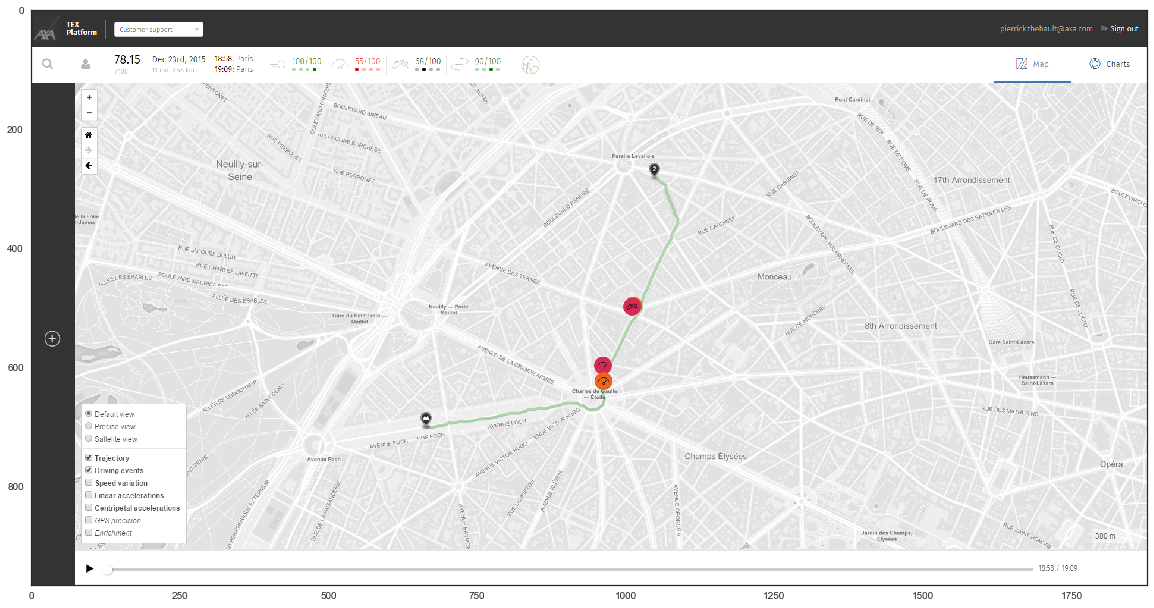

In [17]:
dashboards = plt.imread('./image/dashboard.png')  # Importing dashboards images

plt.figure(figsize=(20,20))
plt.imshow(dashboards)
plt.show()

## 3) Plotting features distributions with seaborn package <font color='blue'> (20 min) </font>

### <font color='red'>Refer to the following pages to understand how you can leverage the <i>seaborn</i> package to understand your data:</font>

- http://stanford.edu/~mwaskom/software/seaborn/examples/distplot_options.html
- http://stanford.edu/~mwaskom/software/seaborn/examples/

### <font color='red'>3.1) Plot the distribution of trip durations (in minutes) using <i>sns.distplot(data.column_name)</i></font>

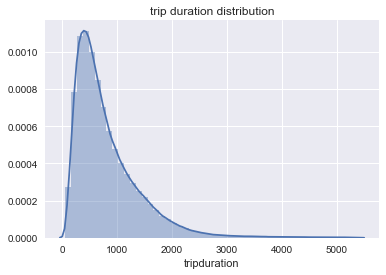

In [18]:
sns.set_style("darkgrid")  # This uses the dark style of seaborn for better understanding
#### PLOT THE DISTRIBUTION OF TRIP DURATIONS, MAKING SURE YOU ADD X AND Y LABELS, AS WELL AS A CLEAR TITLE ####
sns.distplot(data.tripduration , label='trip duration')
plt.title("trip duration distribution")

### <font color='red'>3.2) Filter out data for which gender is unknown (i.e gender=0) and birth year is before 1935</font>

In [19]:
#### TO ADD FILTERING CONDITIONS USE (data[column_name]<value) & (data[column_name]==value) ####

filtering_condition = (data['gender']!=0) & (data['birth year']>1935)

truncated_data = data[filtering_condition]

### <font color='red'>3.3) Plot the distribution of bikes riders subscribers ages</font>

In [20]:
truncated_data['ages'] = 2015-truncated_data['birth year']

/Users/axa/.pyenv/versions/2.7.12/envs/DS/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


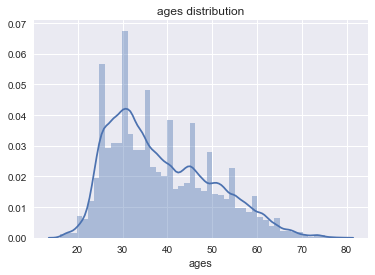

In [21]:
#### PLOT THE DISTRIBUTION OF SUBSCRIBERS AGES, MAKING SURE YOU ADD X AND Y LABELS, AS WELL AS A CLEAR TITLE ####
sns.distplot(truncated_data['ages'],label='ages')
plt.title('ages distribution')

### <font color='red'>3.4) Use <i>sns.countplot</i> on <i>data.usertype</i> to understand the repartition of genders and usertypes</font>

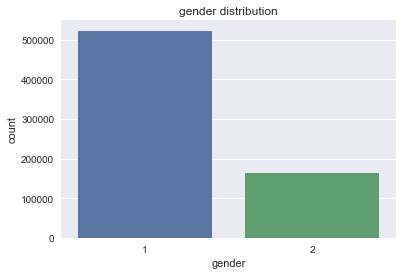

In [22]:
#### PLOT THE DISTRIBUTION OF GENDERS HERE, MAKING SURE YOU ADD X AND Y LABELS, AS WELL AS A CLEAR TITLE ####
sns.countplot("gender", data = truncated_data, label='usertype')
plt.title('gender distribution')

In [23]:
set(truncated_data.usertype)

{'Subscriber'}

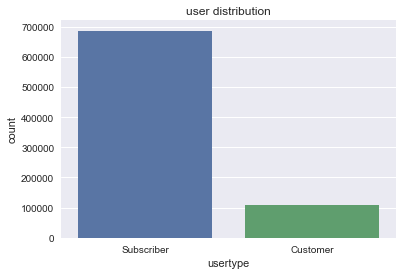

In [24]:
#### PLOT THE DISTRIBUTION OF USERTYPES HERE, MAKING SURE YOU ADD X AND Y LABELS, AS WELL AS A CLEAR TITLE ####
sns.countplot("usertype", data = data, label='usertype')
plt.title('user distribution')

## Matplotlib piecharts

### <font color='red'>Run the following blocks, that group by data with respect to gender</font>

In [25]:
groupby_gender = data.groupby(['gender']).count()

In [26]:
groupby_gender

tripduration  starttime  stoptime  start station id  \
gender                                                        
0             110588     110588    110588            110588   
1             523165     523165    523165            523165   
2             163466     163466    163466            163466   

        start station name  start station latitude  start station longitude  \
gender                                                                        
0                   110588                  110588                   110588   
1                   523165                  523165                   523165   
2                   163466                  163466                   163466   

        end station id  end station name  end station latitude  \
gender                                                           
0               110588            110588                110588   
1               523165            523165                523165   
2               163466            163466                163466   

        end station longitude  bikeid  usertype  birth year  Precipitationmm  \
gender                                                                         
0                      110588  110588    110588      110588           110588   
1                      523165  523165    523165      523165           523165   
2                      163466  163466    163466      163466           163466   

        Conditions  TemperatureC  total_docks_start  total_docks_end  
gender                                                                
0           110588        110588             110588           110588  
1           523165        523165             523165           523165  
2           163466        163466             163466           163466

### <font color='red'>3.5) Use <i>plt.pie</i> with the <i>labels</i> and <i>explode</i> attributes to plot differently the number of males, females, and unknown genders</font>

In [27]:
groupby_gender.reset_index().tripduration

0    110588
1    523165
2    163466
Name: tripduration, dtype: int64

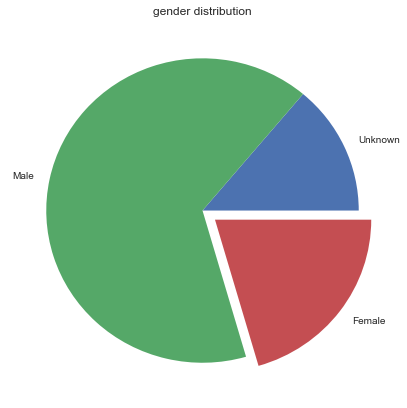

In [28]:
explode = (0, 0, 0.1)
labels = ['Unknown','Male','Female']

plt.figure(figsize=(7,7))

#### USE plt.pie() WITH THE RIGHT ATTRIBUTES TO PIE PLOT MALES, FEMALES, UNKNOWN GENDERS ####
x = groupby_gender.reset_index().tripduration
plt.pie(x, explode=explode, labels=labels)
plt.title("gender distribution")
plt.show()

### <font color='red'>3.6) Use <i>sns.countplot</i> to plot number of trips vs. weather conditions for <i>truncated_data</i></font>

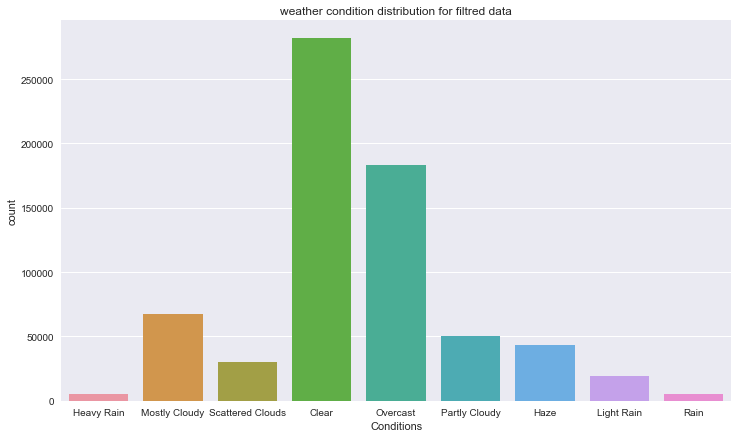

In [29]:
plt.figure(figsize=(12,7))
sns.countplot("Conditions", data = truncated_data, label='weather condition')
plt.title('weather condition distribution for filtred data')

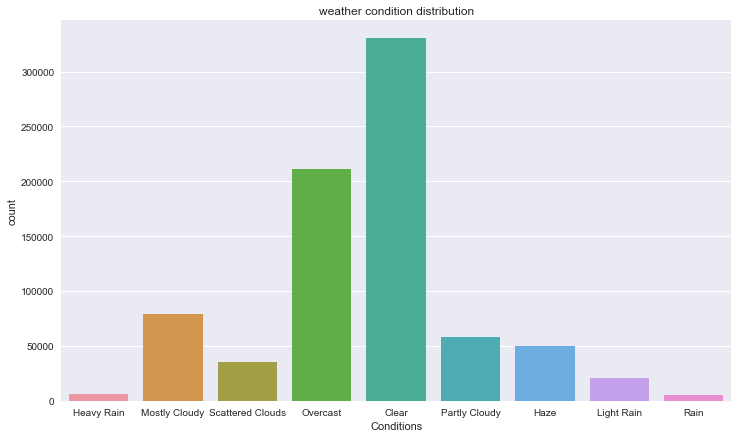

In [30]:
## USE sns.countplot() HERE FOR NUMBER OF TRIPS VS. WEATHER CONDITIONS ####
#### ADD A CLEAR TITLE ####

plt.figure(figsize=(12,7))
sns.countplot("Conditions", data = data, label='weather condition')
plt.title('weather condition distribution')

## 4) Build a graph with the <i>networkx</i> package <font color='blue'> (40 min) </font>

- NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks
- Package tutorial can be found on http://networkx.readthedocs.io/en/networkx-1.11/tutorial/
- It can be used in the case of NYC Bikes Dataset : stations will be the nodes, and trips from station to station will be directed edges

### <font color='red'>4.1) Import the <i>networkx</i> package and alias it as <i>nx</i></font>

In [31]:
import networkx as nx

### <font color='red'>4.2) Create a new directed graph with the <i>DiGraph()</i> function of the <i>nx</i> module</font>

In [32]:
graph_stations = nx.DiGraph()

##### Add directed links from station to station

### <font color='red'>4.3) Run the following block and understand what the <i>stations_indexes</i> and stations_links objects are</font>

In [33]:
# get all the combination 
# for each combinasion we get the corresponding idexes
stations_indexes = data.groupby(['start station id', 'end station id']).groups

In [34]:
stations_links = {(k[0],k[1],len(v)) for k,v in stations_indexes.iteritems()}

In [35]:
#check 
sum([x[2] for x in stations_links]) - len(data)

0

In [36]:
#### UNDERSTAND THE STRUCTURE OF stations_links  and stations_indexes ####

### <font color='red'>4.3) Use the <i>add_weighted_edges_from()</i> function of any networkx Directed Graph to build the directed links from station to station</font>

In [37]:
#### ADD THE WEIGHTED EDGES FROM stations_links TO graph_stations ####

graph_stations.add_weighted_edges_from(stations_links)

##### Analyze graph

### <font color='red'>4.4) Analyze the graph using the following functions on the graph:</font>
- nodes()
- edges()
- in_degree()
- nodes_with_selfloops()

In [38]:
graph_stations.edges(data=True)

[(513, 513, {'weight': 49}),
 (513, 514, {'weight': 33}),
 (513, 515, {'weight': 11}),
 (513, 516, {'weight': 2}),
 (513, 517, {'weight': 3}),
 (513, 518, {'weight': 2}),
 (513, 519, {'weight': 13}),
 (513, 520, {'weight': 14}),
 (513, 522, {'weight': 12}),
 (513, 523, {'weight': 18}),
 (513, 524, {'weight': 4}),
 (513, 525, {'weight': 13}),
 (513, 527, {'weight': 7}),
 (513, 528, {'weight': 4}),
 (513, 529, {'weight': 79}),
 (513, 530, {'weight': 14}),
 (513, 531, {'weight': 2}),
 (513, 533, {'weight': 30}),
 (513, 534, {'weight': 5}),
 (513, 536, {'weight': 1}),
 (513, 537, {'weight': 5}),
 (513, 545, {'weight': 1}),
 (513, 546, {'weight': 7}),
 (513, 72, {'weight': 14}),
 (513, 79, {'weight': 1}),
 (513, 3002, {'weight': 11}),
 (513, 2002, {'weight': 1}),
 (513, 116, {'weight': 6}),
 (513, 127, {'weight': 7}),
 (513, 128, {'weight': 3}),
 (513, 363, {'weight': 1}),
 (513, 137, {'weight': 11}),
 (513, 146, {'weight': 3}),
 (513, 147, {'weight': 20}),
 (513, 152, {'weight': 3}),
 (513

### <font color='red'>4.4) Run the following block. What does it show ?</font>

In [39]:
sorted(graph_stations.edges(data=True), key = lambda x: x[2]['weight'], reverse=True)[:10]

[(2006, 2006, {'weight': 1940}),
 (281, 281, {'weight': 712}),
 (499, 499, {'weight': 623}),
 (387, 387, {'weight': 540}),
 (514, 426, {'weight': 453}),
 (519, 492, {'weight': 437}),
 (435, 509, {'weight': 430}),
 (281, 499, {'weight': 430}),
 (426, 426, {'weight': 382}),
 (363, 327, {'weight': 381})]

### <font color='red'>4.5) Print the id of the graph-centric station using <i>nx.degree_centrality()</i></font>

In [40]:
nx.degree_centrality(graph_stations)

{72: 1.3443708609271523,
 79: 1.466887417218543,
 82: 0.9768211920529801,
 83: 0.9337748344370861,
 116: 1.5198675496688743,
 119: 0.24834437086092714,
 120: 0.6291390728476821,
 127: 1.7119205298013245,
 128: 1.7847682119205297,
 137: 1.1523178807947019,
 143: 1.0794701986754967,
 144: 0.7483443708609272,
 146: 1.4602649006622517,
 147: 1.705298013245033,
 150: 1.4801324503311257,
 151: 1.814569536423841,
 152: 1.533112582781457,
 153: 1.4933774834437086,
 157: 1.0662251655629138,
 161: 1.7317880794701987,
 164: 1.380794701986755,
 167: 1.5033112582781456,
 168: 1.6655629139072847,
 173: 1.2682119205298013,
 174: 1.4602649006622517,
 195: 1.6490066225165563,
 212: 0.013245033112582781,
 216: 0.4768211920529801,
 217: 1.0894039735099337,
 223: 1.4635761589403973,
 224: 1.413907284768212,
 225: 1.5298013245033113,
 228: 1.3013245033112584,
 232: 0.7682119205298014,
 236: 1.6887417218543046,
 237: 1.6754966887417218,
 238: 1.3642384105960266,
 239: 0.5364238410596026,
 241: 0.69536423841

### <font color='red'>4.6) Plot the graph using the <i>draw_networkx</i> function of the module. You can use the following attributes for clarity:</font>
- arrows=False
- pos = nx.spring_layout(graph_stations)
- width=0.1

<b>Note</b>: You will get different plots for different executions, as initial positions within the graph are random.

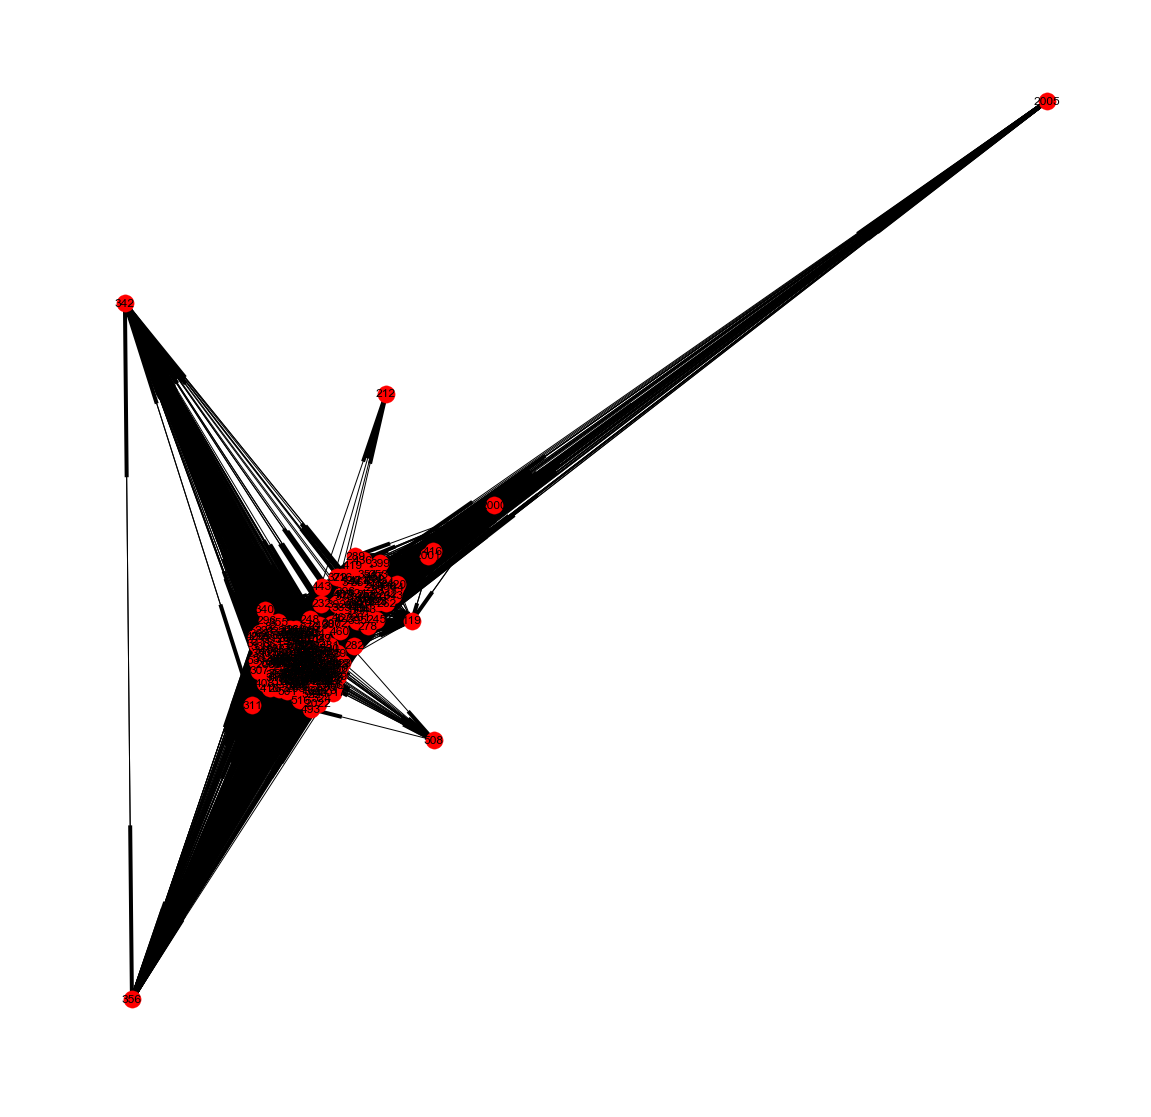

In [41]:
plt.figure(figsize=(20,20))

#### PLOT THE NETWORK HERE ####
arrows=False
pos = nx.spring_layout(graph_stations)
nx.draw_networkx(graph_stations,pos)
width=0.1
plt.axis('off')
plt.show()

#### *Plot most common self-looping stations*

In [42]:
self_looping_stations = sorted(graph_stations.selfloop_edges(data=True),
                               key = lambda x : x[2]['weight'], reverse=True)[:10]

In [43]:
self_looping_stations

[(2006, 2006, {'weight': 1940}),
 (281, 281, {'weight': 712}),
 (499, 499, {'weight': 623}),
 (387, 387, {'weight': 540}),
 (426, 426, {'weight': 382}),
 (457, 457, {'weight': 346}),
 (514, 514, {'weight': 275}),
 (3002, 3002, {'weight': 245}),
 (217, 217, {'weight': 187}),
 (327, 327, {'weight': 187})]

### <font color='red'>4.7) Create a Directed Graph containing only the self-looping stations</font>

In [44]:
self_looping_stations_graph = nx.DiGraph(self_looping_stations)

#self_looping_stations_graph.add_weighted_edges_from(self_looping_stations)

### <font color='red'>Run the following blocks, they define the self-looping stations latitudes and longitudes and add them to two lists</font>

In [45]:
self_looping_stations_ids = self_looping_stations_graph.nodes()

In [46]:
self_looping_stations_long = \
[data[data['start station id']==id].iloc[0]['start station longitude'] for id in self_looping_stations_ids]

self_looping_stations_lat = \
[data[data['start station id']==id].iloc[0]['start station latitude'] for id in self_looping_stations_ids]

### <font color='red'>4.8) Plot the self looping stations on the Manhattan background as you did in the first part of the hands-on session:</font>

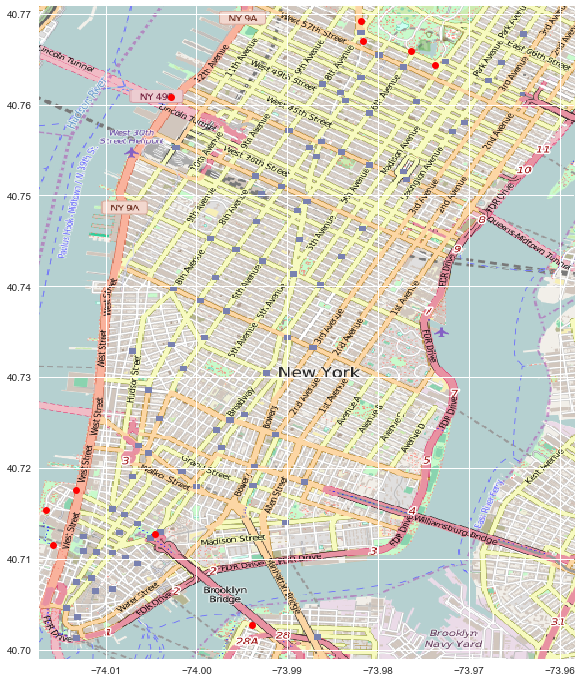

In [47]:
l,r,b,t = (-74.0173,-73.9584,40.6990,40.7708)


plt.figure(figsize=(12,12))

im = plt.imread('./image/map.png')
plt.imshow(im,extent=[l,r,b,t])
sns.set_style('white')

#### PLOT THE SELF-LOOPING STATIONS ON THE BACKGROUND IMAGE. HOW ARE THEY DISTRIBUTED AROUND MANHATTAN ? ####
plt.plot(self_looping_stations_long,self_looping_stations_lat,'or')

##### Draw most common directed trips

### <font color='red'>Run the following block, that keeps the most common trips:</font>

In [48]:
common_trips = sorted([(u,v,d) for (u,v,d) in graph_stations.edges(data=True) if u!=v],
                              key = lambda x : x[2]['weight'], reverse=True)[:5]

### <font color='red'>4.9) Understand the structure of <i>common_trips</i>, and build a directed graph from these trips:</font>

In [49]:
#### ANALYZE THE STRUCTURE OF THE OBJECT common_trips ####
common_trips

[(514, 426, {'weight': 453}),
 (519, 492, {'weight': 437}),
 (435, 509, {'weight': 430}),
 (281, 499, {'weight': 430}),
 (363, 327, {'weight': 381})]

In [50]:
common_trips_graph = nx.DiGraph(common_trips)

### <font color='red'>4.10) Plot the graph of the most common trips:</font>

In [51]:
common_trips_graph

<class 'networkx.classes.digraph.DiGraph'>


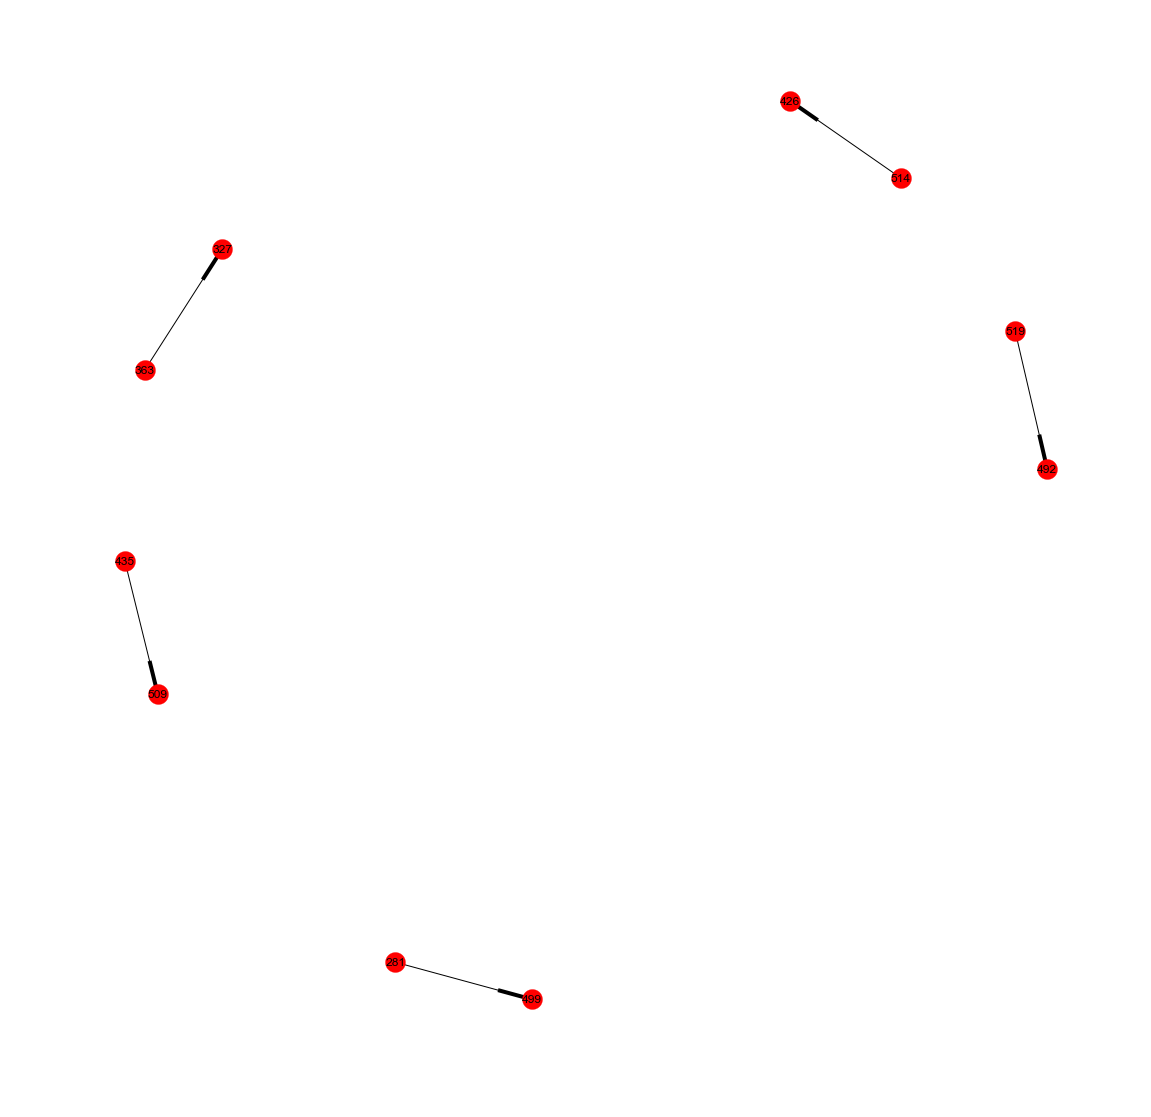

In [52]:
plt.figure(figsize=(20,20))

#### PLOT THE NETWORK HERE ####
arrows=False
print type(common_trips_graph)
pos = nx.spring_layout(common_trips_graph, k=1, iterations=50)
nx.draw_networkx(common_trips_graph, pos=pos, node_size=400)
width = 0.1
plt.axis('off')
plt.show()


##### Plot these common trips

### <font color='red'>4.11) Run the following block, understand what it does, as well as the structure of <i>coordinates_common_trips</i>:</font>

In [53]:
common_trips_ids = common_trips_graph.nodes()
coordinates_common_trips = {}

for id_station in common_trips_ids:
    station = data[data['start station id']==id_station].iloc[0]
    coordinates_common_trips.update({
                                    id_station: (station['start station longitude'],
                                         station['start station latitude'])
                                    }
                                    )

In [54]:
#### UNDERSTAND THE OBJECT coordinates_common_trips ####

# Get the gps positions of the most common trip_id
coordinates_common_trips

{281: (-73.973714650000005, 40.764397100000004),
 327: (-74.016583539999999, 40.715337899999994),
 363: (-74.01713445, 40.708346980000002),
 426: (-74.013220689999997, 40.71754834),
 435: (-73.994155559999996, 40.741739690000003),
 492: (-73.990930849999998, 40.750199950000003),
 499: (-73.981918410000006, 40.769155050000002),
 509: (-74.001971389999994, 40.745497299999997),
 514: (-74.002776679999997, 40.76087502),
 519: (-73.977706000000012, 40.751872999999996)}

### <font color='red'>4.12) Plot the different start and end coordinates of the most frequent trips on the background image of Manhattan. Add arrows showing the directions of the trips. You might use the following functions:</font>
- plt.plot()
- plt.annotate('', xy=..., xytext=..., arrowprops=...)
- plt.imshow()

In [55]:
coordinates_common_trips

{281: (-73.973714650000005, 40.764397100000004),
 327: (-74.016583539999999, 40.715337899999994),
 363: (-74.01713445, 40.708346980000002),
 426: (-74.013220689999997, 40.71754834),
 435: (-73.994155559999996, 40.741739690000003),
 492: (-73.990930849999998, 40.750199950000003),
 499: (-73.981918410000006, 40.769155050000002),
 509: (-74.001971389999994, 40.745497299999997),
 514: (-74.002776679999997, 40.76087502),
 519: (-73.977706000000012, 40.751872999999996)}

In [56]:
common_trips

[(514, 426, {'weight': 453}),
 (519, 492, {'weight': 437}),
 (435, 509, {'weight': 430}),
 (281, 499, {'weight': 430}),
 (363, 327, {'weight': 381})]

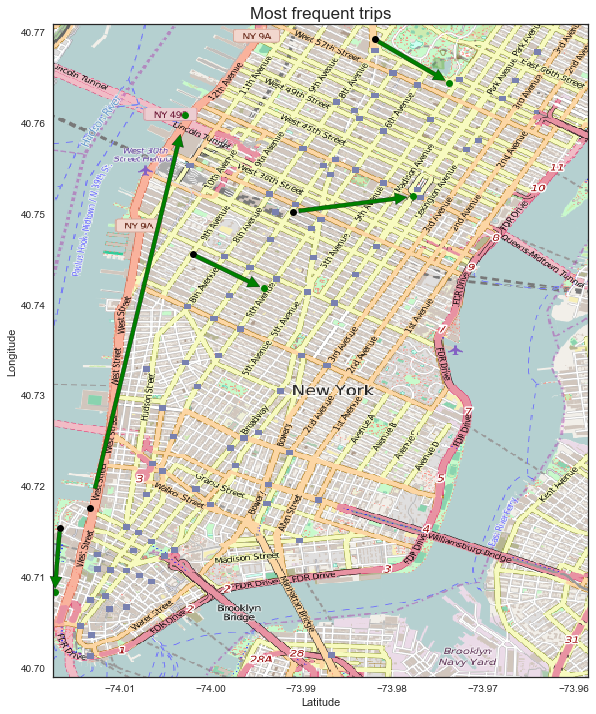

In [57]:
plt.figure(figsize=(12,12))
sns.set_style('white')

for (start,end,weight) in common_trips:  # This loops over the most frequent trips
    
    #### PLOT THE DIFFERENT START AND END STATIONS FOR THE MOST FREQUENT TRIPS ####
    plt.plot(coordinates_common_trips[start][0],coordinates_common_trips[start][1],'or',color='green')
    plt.plot(coordinates_common_trips[end][0],coordinates_common_trips[end][1],'ko')
    
    #### ADD ARROWS ON THE PLOT SO WE CAN SEE THE DIRECTION OF THE TRIPS ####
    plt.annotate('',
                 xy=(coordinates_common_trips[start][0],coordinates_common_trips[start][1]),
                 xytext=(coordinates_common_trips[end][0], coordinates_common_trips[end][1]),
                arrowprops=dict(facecolor='green', shrink=0.05))
    #plt.annotate('direction in',
    #             xy=(coordinates_common_trips[end][0],coordinates_common_trips[end][1]),
    #            arrowprops=dict(facecolor='orange', shrink=0.05))

plt.imshow(im, extent=[l,r,b,t])
plt.title('Most frequent trips', size=17)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

## 5) Build interactive maps with Leaflet <font color='blue'> (10 min) </font>

Refer to the following webpage for more information:
- http://folium.readthedocs.org/en/latest/

### <font color='red'>5.1) Import the <i>folium</i> package</font>

In [58]:
import folium

### <font color='red'>5.2) Create a new map using the <i>.Map()</i> function, located around a given station latitude and longitude:</font>

In [59]:
map_osm = folium.Map(location=[avg_lat,avg_long] ,zoom_start=10)

### <font color='red'>5.3) Run the following block, and study the structure of the <i>stations</i> object:</font>

In [60]:
stations = set(zip(data['start station latitude'],
                   data['start station longitude'],
                   data['start station name'],
                  data['total_docks_start']))\
            .union(set(zip(data['end station latitude'],
                           data['end station longitude'],
                           data['end station name'],
                          data['total_docks_end'])))

In [61]:
stations

{(40.680342420000002, -73.955768939999999, 'Lefferts Pl & Franklin Ave', 25),
 (40.680983390000002, -73.950047979999994, 'Macon St & Nostrand Ave', 24),
 (40.682165640000001, -73.953990259999998, 'Hancock St & Bedford Ave', 27),
 (40.682231659999999, -73.961458300000004, 'Fulton St & Grand Ave', 31),
 (40.683124890000002, -73.978951370000004, 'Dean St & 4 Ave', 34),
 (40.68382604, -73.976323280000003, 'Atlantic Ave & Fort Greene Pl', 62),
 (40.684157480000003, -73.969222729999998, 'Fulton St & Clermont Ave', 27),
 (40.684568299999995, -73.958810810000003, 'Monroe St & Classon Ave', 19),
 (40.685144299999997, -73.953809039999996, 'Monroe St & Bedford Ave', 23),
 (40.685395669999998, -73.974314579999998, 'S Portland Ave & Hanson Pl', 27),
 (40.686500649999999, -73.965633069999996, 'Washington Ave & Greene Ave', 19),
 (40.686767930000002, -73.959281680000004, 'Lexington Ave & Classon Ave', 19),
 (40.686918650000003,
  -73.976681999999997,
  'Lafayette Ave & Fort Greene Pl',
  31),
 (40.68

### <font color='red'>5.4) Add markers to the map using the <i>map_osm.simple_marker()</i> function. You can use the following attributes:</font>
- clustered_marker=True (this will clusterize the markers in a pretty way)
- popup= ... (this will put text when you click on a specific marker. Add for instance the name of the station, and the total number of docks)

In [65]:
clustered_marker = folium.MarkerCluster()
clustered_marker.add_to(map_osm)
for latitude, longitude, station_name, total_docks in stations:
    folium.Marker([latitude,longitude],popup='station_name :{} ,docks:{}'\
                    .format(station_name,total_docks)).add_to(clustered_marker)
    #### ADD THE STATION ON THE MAP AS A SIMPLE MARKER ####
    #### YOU CAN ADD A POPUP ATTRIBUTE THAT SHOWS THE STATION NAME AND TOTAL DOCKS ####

### <font color='red'>Display the map using the <i>display</i> function on the map_osm object. This should show the stations interactively !</font>

In [66]:
map_osm

# 6) Try other visualizations yourself !

# Other nice visualizations

- http://www.newyorker.com/news/news-desk/interactive-a-month-of-citi-bike
- http://bikes.oobrien.com/newyork/#zoom=14&lon=-74.0045&lat=40.7319
- https://vimeo.com/89305412
- http://www.r-bloggers.com/new-yorkers-municipal-bikes-and-the-weather/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+RBloggers+%28R+bloggers%29